In [1]:
import pandas as pd
import numpy as np
# thank you https://www.kaggle.com/code/samanfatima7/cibmtr-bridging-gaps-in-survival
# thank you https://www.kaggle.com/code/cdeotte/pip-install-lifelines
# pip download lifelines
!pip install /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
!pip install /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
!pip install /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl


Processing /kaggle/input/pip-install-lifelines/autograd-1.7.0-py3-none-any.whl
autograd is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Processing /kaggle/input/pip-install-lifelines/autograd-gamma-0.5.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=12b22307bee638aba2b08a6648b2b42c31a17a4f44758e46c52f4b01e4cfef93
  Stored in directory: /root/.cache/pip/wheels/6b/b5/e0/4c79e15c0b5f2c15ecf613c720bb20daab20a666eb67135155
Successfully built autograd-gamma
Processing /kaggle/input/pip-install-lifelines/interface_meta-1.3.0-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/formulaic-1.0.2-py3-none-any.whl
Processing /kaggle/input/pip-install-lifelines/lifelines-0.30.0-py3-none-any.whl


In [2]:

train_df = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/train.csv', index_col = 'ID')
test_df = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/test.csv', index_col = 'ID')

sub = pd.read_csv('/kaggle/input/equity-post-HCT-survival-predictions/sample_submission.csv')



first, EDA

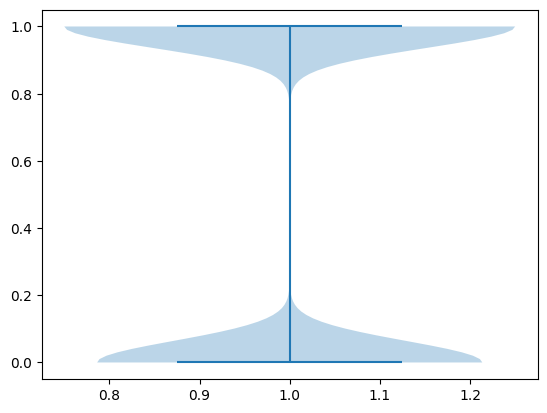

In [3]:
from matplotlib import pyplot as plt
plt.violinplot(train_df['efs'])
plt.show()

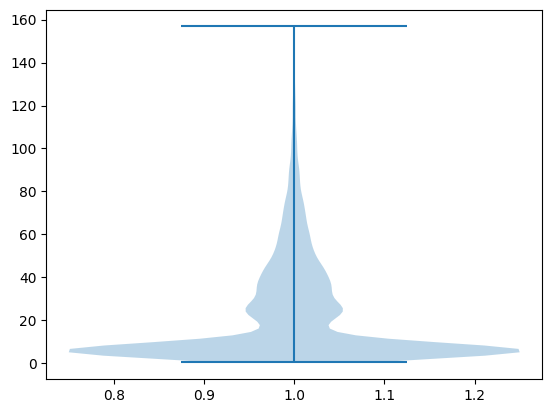

In [4]:
plt.violinplot(train_df['efs_time'])
plt.show()

classification , regressionにtargetを分ける

In [5]:
target_efs = train_df['efs'] # classification
target_efs_time = train_df['efs_time'] # regression

In [6]:
# target_efsについてはclassification, target_efs_timeについてはregression最後にlifelinesからKaplanMeierFitterでtargetを作成し提出する

train = train_df.drop(['efs', 'efs_time'], axis=1)
test = test_df

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


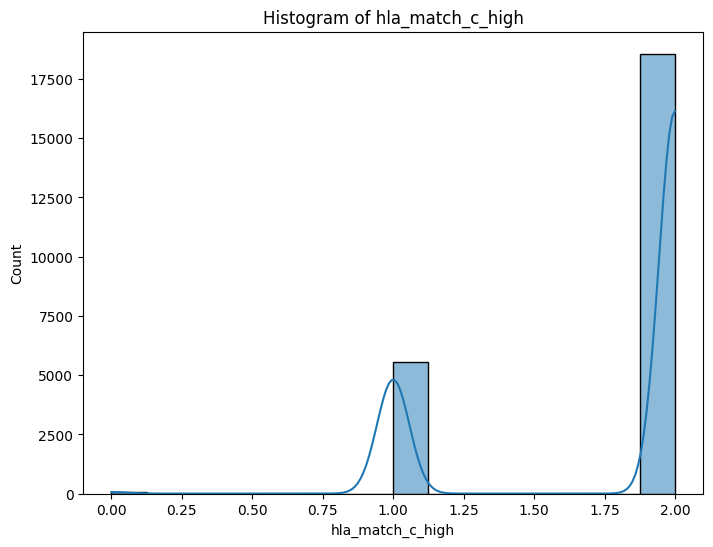

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


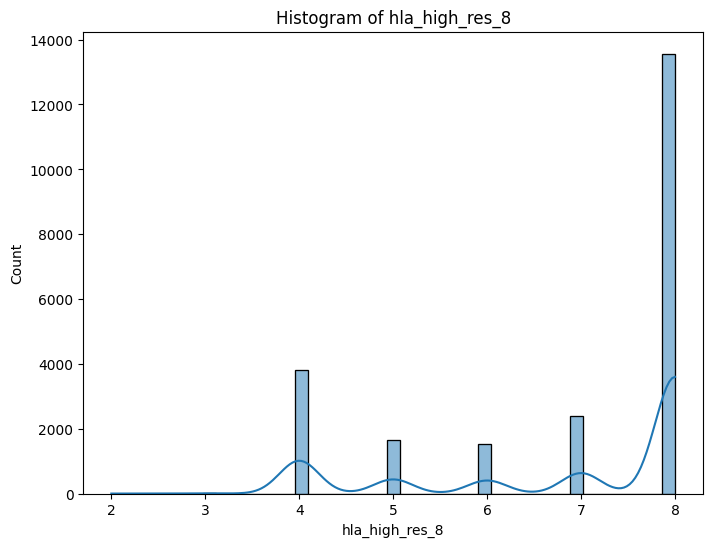

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


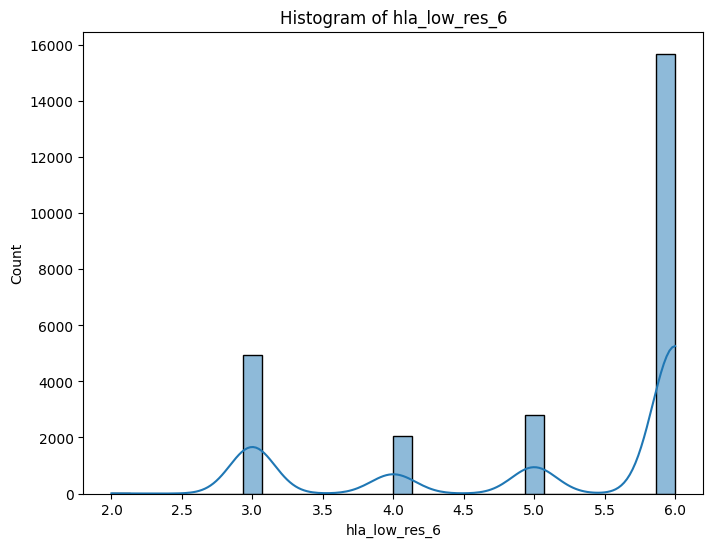

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


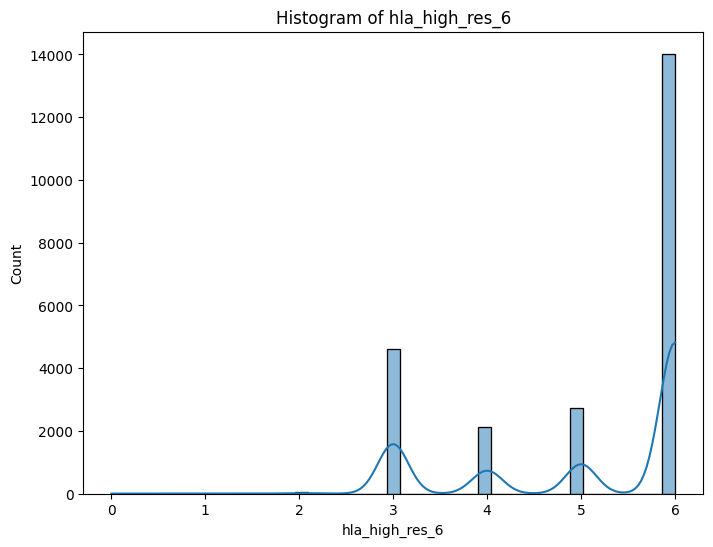

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


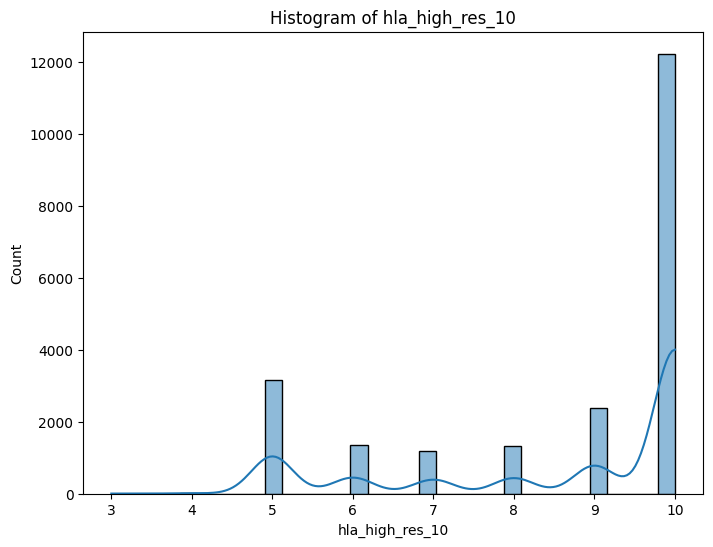

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


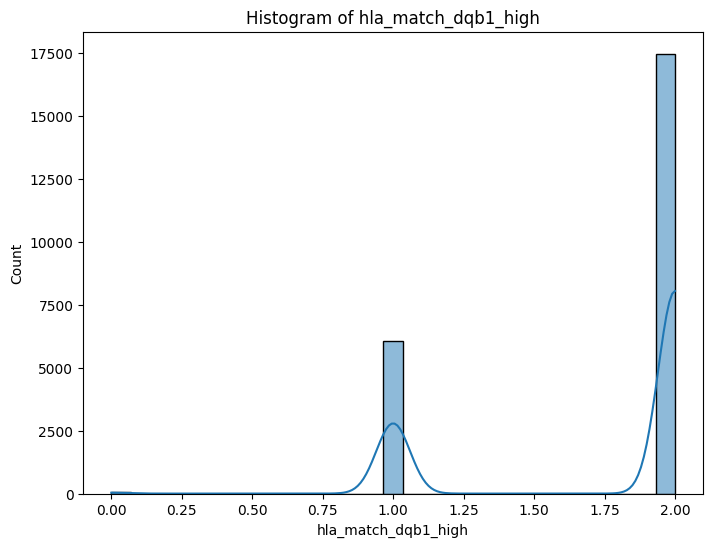

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


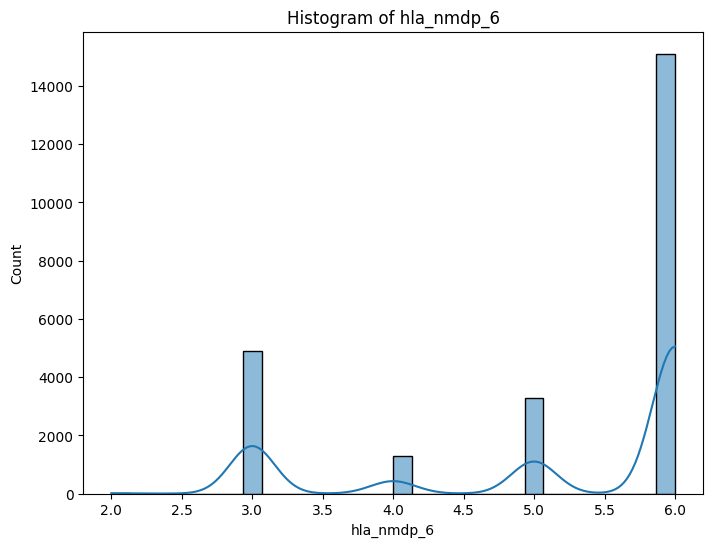

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


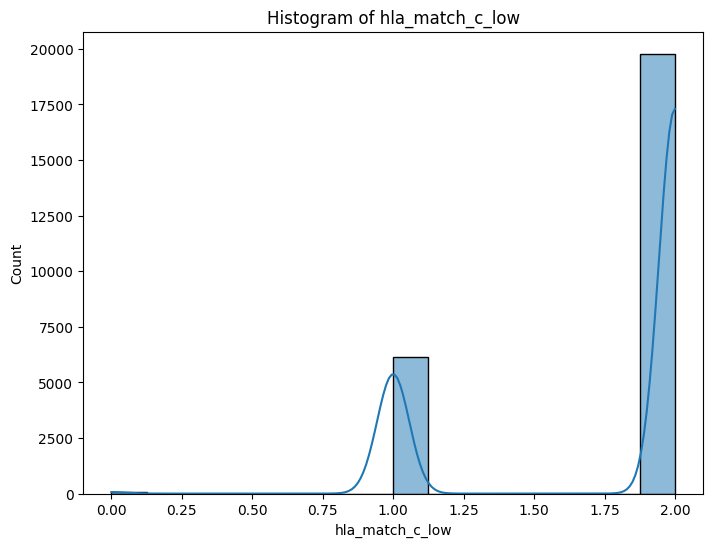

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


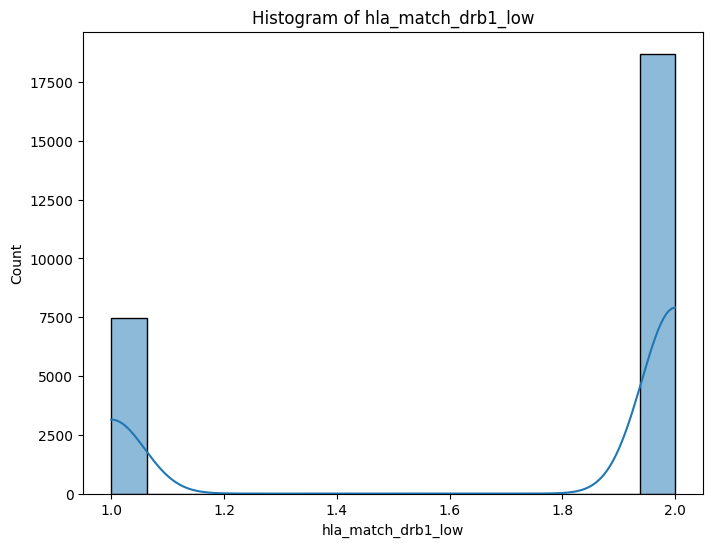

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


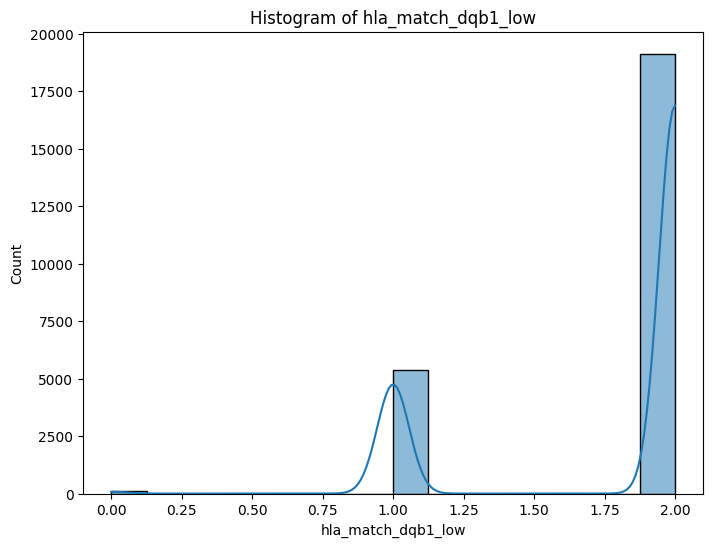

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


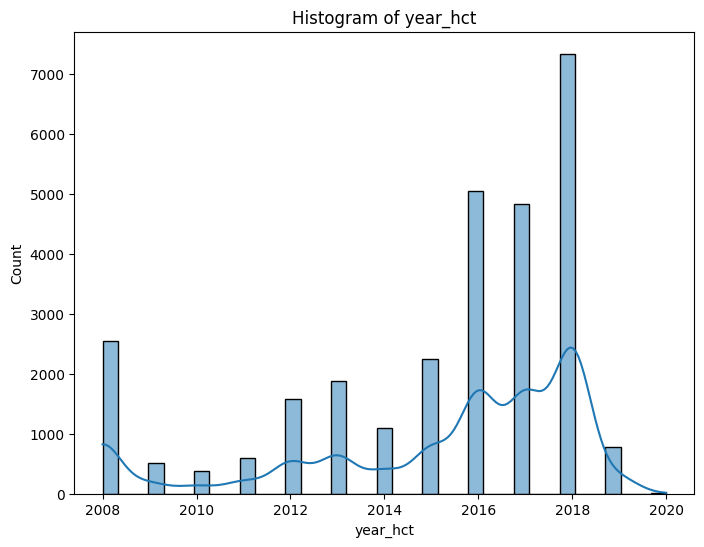

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


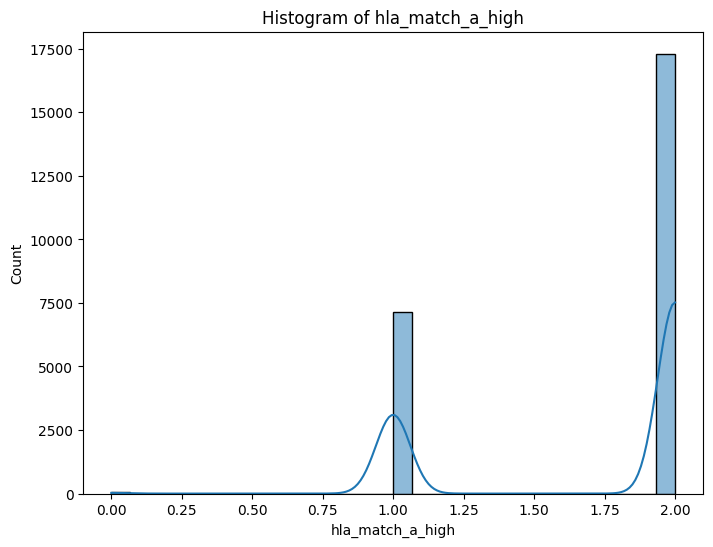

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


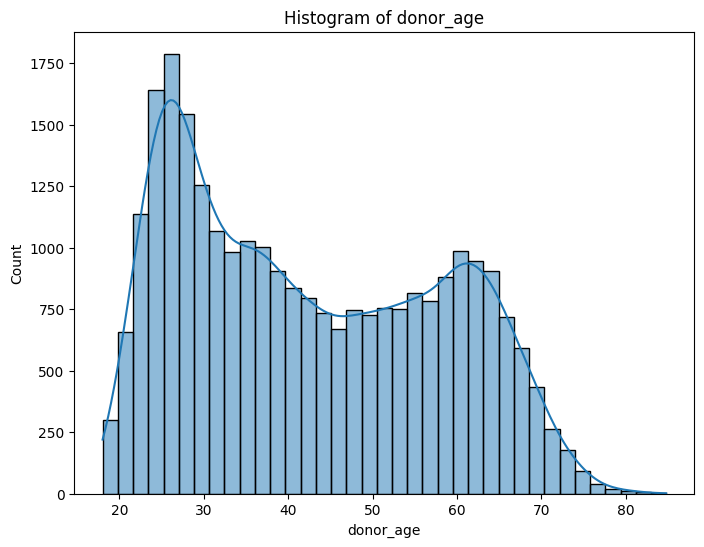

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


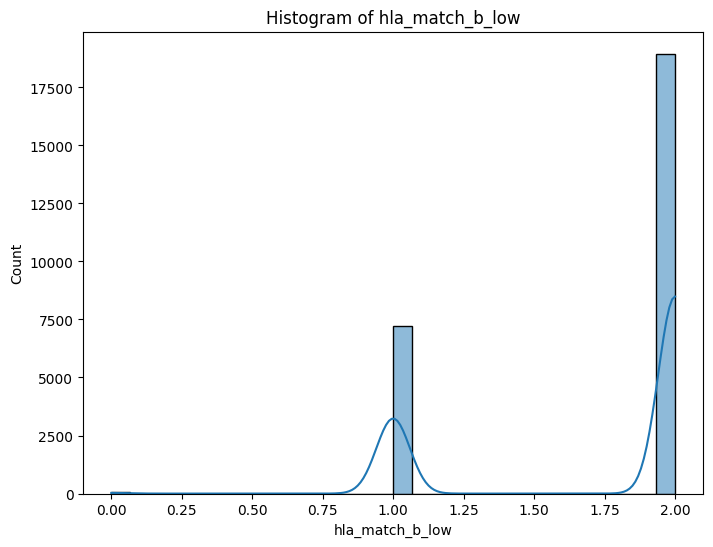

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


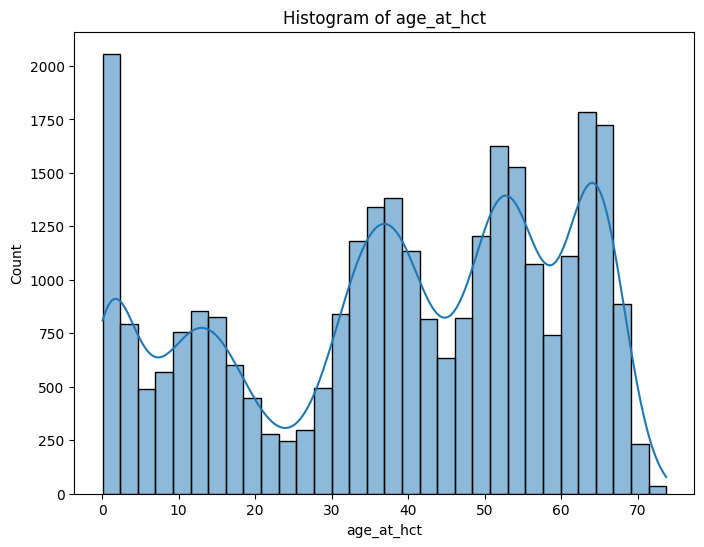

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


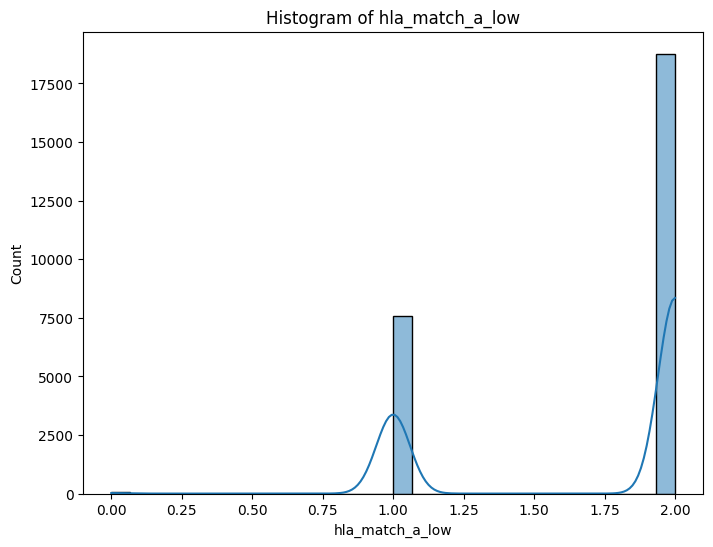

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


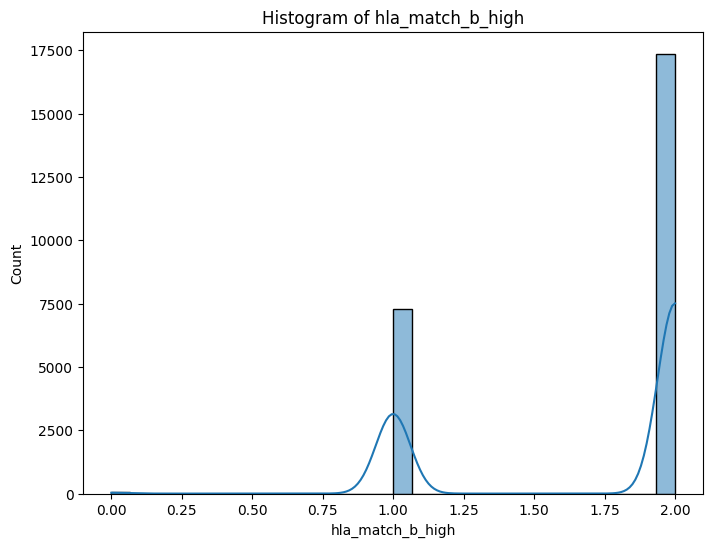

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


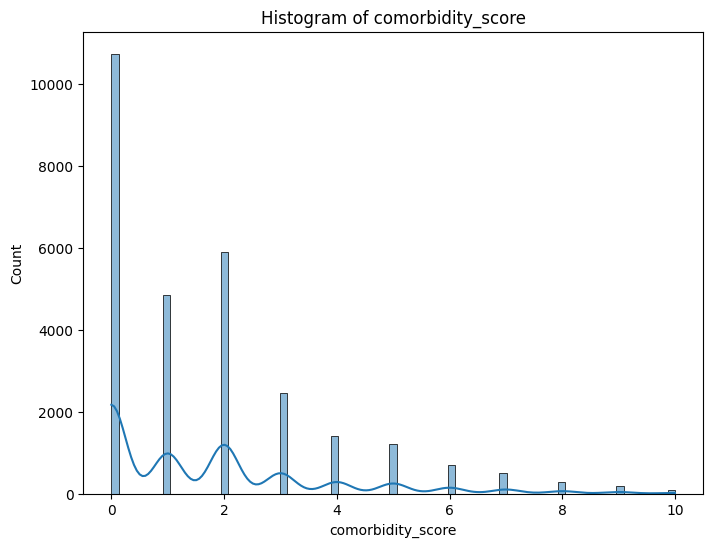

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


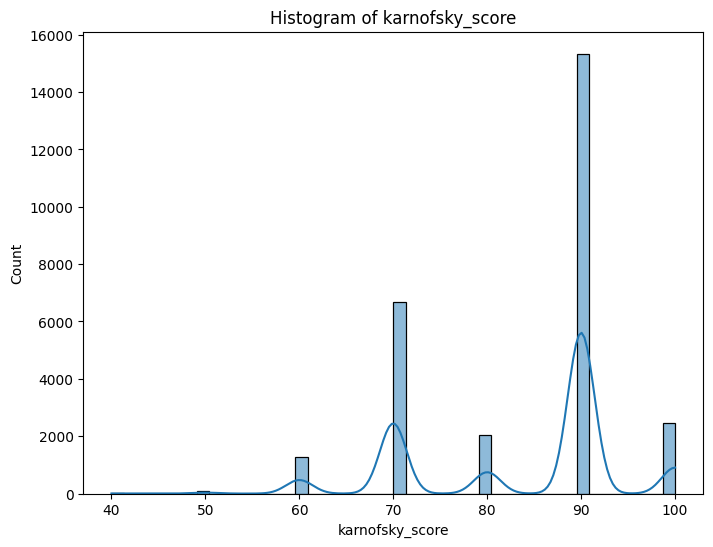

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


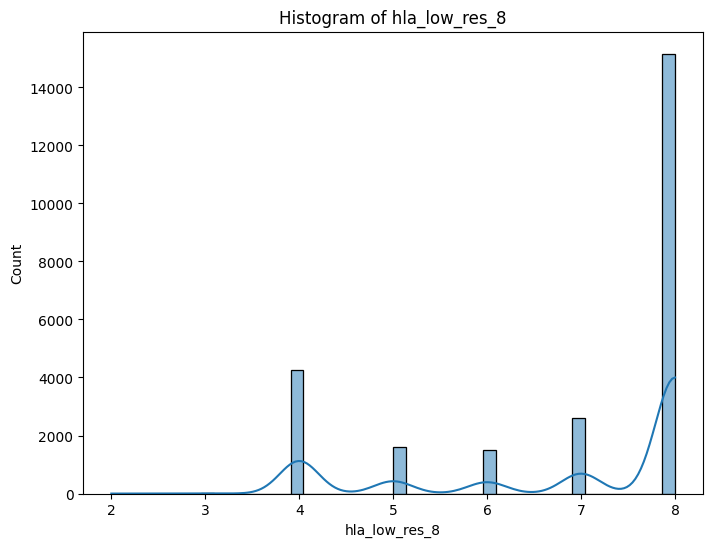

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


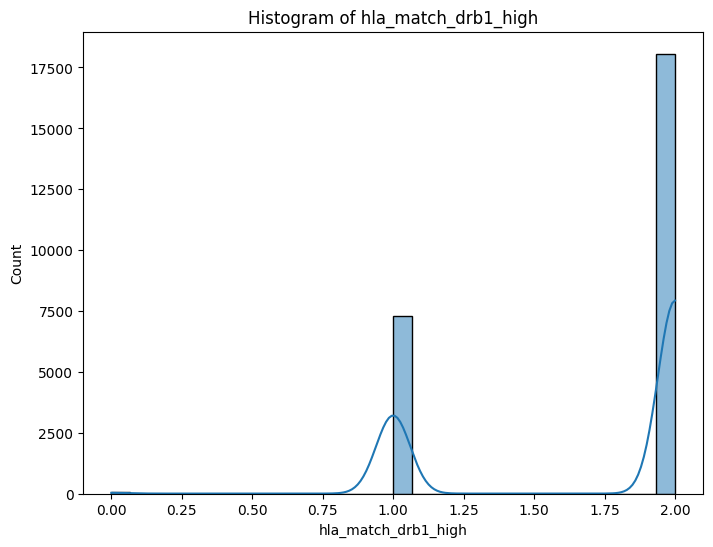

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


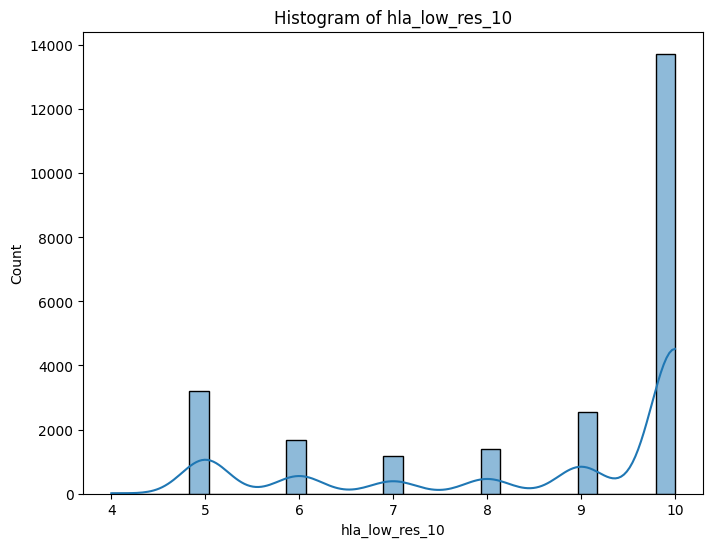

In [7]:
train_numerical = train.select_dtypes(include=[np.number])
train_numerical.fillna(train_numerical.mode(), inplace=True)
train_categorical = train.select_dtypes(exclude=[np.number])
train_categorical = train.select_dtypes(exclude=[np.number]).fillna('missing')

import seaborn as sns

for col in train_numerical.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(train_numerical[col], kde=True)
  plt.title(f'Histogram of {col}')
  plt.show()

# どうやら連続値と離散値に分けれれそうだ

In [8]:
# train_numericalを離散値と連続値に分ける

train_numerical_category = train_numerical.drop(['year_hct', 'donor_age', 'age_at_hct'], axis = 1)
train_numerical_category = train_numerical_category.fillna(0).astype(int).astype('category')
train_numerical = train_numerical[['year_hct', 'donor_age', 'age_at_hct']]
train_categorical = pd.concat([train_categorical, train_numerical_category], axis = 1)

In [9]:
test_numerical = test.select_dtypes(include=[np.number])
test_numerical.fillna(test_numerical.mode(), inplace=True)
test_categorical = test.select_dtypes(exclude=[np.number])
test_categorical = test.select_dtypes(exclude=[np.number]).fillna('missing')

In [10]:
test_numerical_category = test_numerical.drop(['year_hct', 'donor_age', 'age_at_hct'], axis = 1)
test_numerical_category = test_numerical_category.fillna(0).astype(int).astype('category')
test_numerical = test_numerical[['year_hct', 'donor_age', 'age_at_hct']]
test_categorical = pd.concat([test_categorical, test_numerical_category], axis = 1)

In [11]:
from sklearn.preprocessing import LabelEncoder
data_for_label_encoding = pd.concat([train_categorical, test_categorical], axis=0)
for col in train_categorical.columns:
    le = LabelEncoder()
    data_for_label_encoding[col] = le.fit_transform(data_for_label_encoding[col].astype('category'))

train_categorical = data_for_label_encoding[:len(train_categorical)]
test_categorical = data_for_label_encoding[len(train_categorical):]

In [12]:
train_data_efs_for_classification = pd.concat([train_numerical, train_categorical, target_efs], axis=1)
train_data_efs_for_classification

,year_hct,donor_age,age_at_hct,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,...,hla_match_a_high,hla_match_b_low,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs
ID,,,,,,,,,,,,,,,,,,,,,
0,2016,23.570,9.942,7,0,7,0,0,0,0,...,2,2,2,2,0,6,7,2,7,0.0
1,2008,72.290,43.705,2,0,1,0,6,0,1,...,2,2,2,2,3,6,7,2,7,1.0
2,2019,NaN,33.997,7,0,7,0,0,0,0,...,2,2,2,2,0,6,7,2,7,0.0
3,2009,29.230,43.245,0,0,1,0,0,0,0,...,2,2,2,2,0,6,7,2,7,0.0
4,2018,56.810,29.740,0,0,7,0,0,0,1,...,2,2,2,2,1,6,7,2,7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28795,2018,24.212,51.136,3,3,0,0,0,0,1,...,2,2,2,2,0,0,7,2,7,0.0
28796,2017,30.770,18.075,0,0,5,2,0,0,1,...,1,1,2,1,3,6,5,1,5,1.0
28797,2018,22.627,51.005,9,3,5,3,0,3,1,...,2,2,2,2,5,6,7,2,7,0.0


In [13]:
test_data_efs_for_classification = pd.concat([test_numerical, test_categorical], axis=1)
test_data_efs_for_classification

,year_hct,donor_age,age_at_hct,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,...,hla_match_dqb1_low,hla_match_a_high,hla_match_b_low,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10
ID,,,,,,,,,,,,,,,,,,,,,
28800,2016,NaN,9.942,7,0,7,0,0,0,0,...,2,2,2,2,2,0,6,7,2,7
28801,2008,72.29,43.705,2,0,1,0,6,0,1,...,2,2,2,2,2,3,6,7,2,7
28802,2019,NaN,33.997,7,0,7,0,0,0,0,...,2,2,2,2,2,0,6,7,2,7


In [14]:
import lightgbm as lgb

lgb_train = lgb.Dataset(train_data_efs_for_classification.drop('efs', axis=1), train_data_efs_for_classification['efs'])
lgb_test = lgb.Dataset(test_data_efs_for_classification)

params = {
    'objective': 'multiclass',
    'num_class': 2,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 10,
    'num_boost_round':1000
}

lgb_model = lgb.train(params, lgb_train, num_boost_round=1000)

y_pred_for_classification = lgb_model.predict(test_data_efs_for_classification,num_iteration = lgb_model.best_iteration)
y_pred_for_classification = np.argmax(y_pred_for_classification, axis=1)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 28800, number of used features: 57
[LightGBM] [Info] Start training from score -0.775020
[LightGBM] [Info] Start training from score -0.617473


In [15]:
y_pred_for_classification

array([0, 1, 0])

In [16]:
train_data_for_regression = pd.concat([train_numerical, train_categorical, target_efs_time], axis=1)
test_data_for_regression = pd.concat([test_numerical, test_categorical],axis = 1)

In [17]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(train_data_for_regression.drop('efs_time', axis=1), train_data_for_regression['efs_time'], test_size=0.2, random_state=42, shuffle=True)

lgb_train = lgb.Dataset(X_train, y_train)   
lgb_val = lgb.Dataset(X_val, y_val)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting:type': 'gbdt',
    'num_leaves': 10,
    'num_boost_round':1000
}

lgb_model_for_regression = lgb.train(params, lgb_train, num_boost_round=1000, valid_sets=[lgb_val])
y_pred_for_regression = lgb_model_for_regression.predict(test_data_for_regression, num_iteration=lgb_model_for_regression.best_iteration)
y_pred_for_regression

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:204: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Unknown parameter: boosting:type
[LightGBM] [Warning] Unknown parameter: boosting:type
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 23040, number of used features: 57
[LightGBM] [Warning] Unknown parameter: boosting:type
[LightGBM] [Info] Start training from score 23.166184


array([34.30612667, 16.8918178 , 18.75938973])

In [18]:
train_data = pd.concat([train_numerical, train_categorical, target_efs, target_efs_time], axis=1)
test_data = pd.concat([test_numerical, test_categorical], axis=1)
test_data['efs'] = y_pred_for_classification
test_data['efs_time'] = y_pred_for_regression

train_data = pd.concat([train_numerical, train_categorical, target_efs, target_efs_time], axis=1)
test_data = pd.concat([test_numerical, test_categorical], axis=1)
test_data['efs'] = y_pred_for_classification
test_data['efs_time'] = y_pred_for_regression

data = pd.concat([train_data, test_data], axis = 0)
data

,year_hct,donor_age,age_at_hct,dri_score,psych_disturb,cyto_score,diabetes,tbi_status,arrhythmia,graft_type,...,hla_match_b_low,hla_match_a_low,hla_match_b_high,comorbidity_score,karnofsky_score,hla_low_res_8,hla_match_drb1_high,hla_low_res_10,efs,efs_time
ID,,,,,,,,,,,,,,,,,,,,,
0,2016,23.570,9.942,7,0,7,0,0,0,0,...,2,2,2,0,6,7,2,7,0.0,42.356000
1,2008,72.290,43.705,2,0,1,0,6,0,1,...,2,2,2,3,6,7,2,7,1.0,4.672000
2,2019,NaN,33.997,7,0,7,0,0,0,0,...,2,2,2,0,6,7,2,7,0.0,19.793000
3,2009,29.230,43.245,0,0,1,0,0,0,0,...,2,2,2,0,6,7,2,7,0.0,102.349000
4,2018,56.810,29.740,0,0,7,0,0,0,1,...,2,2,2,1,6,7,2,7,0.0,16.223000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28798,2018,58.074,0.044,7,0,5,0,0,0,1,...,1,1,1,1,6,3,1,2,0.0,52.351000
28799,2018,30.571,1.035,8,0,7,0,0,0,0,...,2,2,2,2,6,7,2,7,0.0,25.158000
28800,2016,NaN,9.942,7,0,7,0,0,0,0,...,2,2,2,0,6,7,2,7,0.0,34.306127


<Axes: xlabel='timeline'>

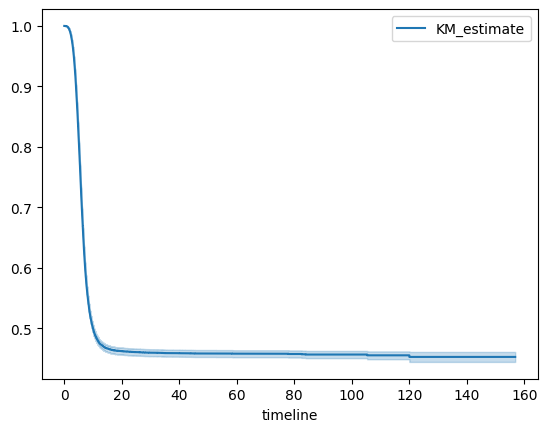

In [19]:
from lifelines import KaplanMeierFitter
'''
def transform_survival_probability(df, time_col='efs_time', event_col='efs'):

    kmf = KaplanMeierFitter()

    kmf.fit(df[time_col], event_observed=df[event_col])

    survival_probabilities = kmf.survival_function_at_times(df[time_col]).values.flatten()

    censored_mask = df[event_col] == 0

    return survival_probabilities
'''

# train_time = train_data['efs_time']
# train_event = train_data['efs']

test_time = test_data['efs_time']
test_event = test_data['efs']



data_time = data['efs_time']
data_event = data['efs']

kmf = KaplanMeierFitter()

kmf.fit(data_time, event_observed=data_event)

kmf.plot()

In [20]:
survival_probabilities = kmf.survival_function_at_times(test_time).values

In [21]:
survival_probabilities

array([0.4592701 , 0.46398987, 0.46278898])

In [22]:
sub['prediction'] = survival_probabilities
sub.to_csv('submission.csv', index = False)
sub

,ID,prediction
0,28800,0.459270
1,28801,0.463990
2,28802,0.462789
